# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from scipy.io import arff

## 1. Initial practice with the K-means and HAC algorithms

### 1.1 (10%) K-means
Run K-means on this [Abalone Dataset.](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff)
The dataset was modified to be smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points are commented out. Treat the output class (last column) as an additional input feature. Create your K-Mmeans model with the paramaters K-means(n_clusters=3, init='random', n_init=1)

Output the following:
- Class label for each point (labels_)
- The k=3 cluster centers (cluster_centers_)
- Number of iterations it took to converge (n_iter_)
- Total sum squared error of each point from its cluster center (inertia_)
- The total average silhouette score (see sklearn.metrics silhouette_score)

In [7]:
# !wget https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff

In [12]:
# K-means with Abalone
# Load the arff file
data, meta = arff.loadarff('abalone.arff')
aba_df = pd.DataFrame(data)

# Convert byte to strings
aba_df = aba_df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
aba_df

# Create the KMeans model
kmeans = KMeans(n_clusters=3, init='random', n_init=1)

# Fit the model
kmeans.fit(aba_df)

# Output the class labels for each point
print("Class labels for each point:", kmeans.labels_)
print("Cluster centers:", kmeans.cluster_centers_)
print("Number of iterations:", kmeans.n_iter_)
print("Total sum squared error (inertia):", kmeans.inertia_)
silhouette_avg = silhouette_score(aba_df, kmeans.labels_)
print("The total average silhouette score:", silhouette_avg)

Class labels for each point: [1 2 0 0 2 2 1 1 0 1 1 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 1
 2 0 0 0 1 2 2 2 2 0 2 2 0 2 2 0 0 2 2 2 2 2 2 2 0 0 2 2 2 0 1 0 2 1 2 1 0
 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 2 2 0 2 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 2 1 2 2 2 2 2 1 1 1 0 2 2 2 2 2 0 0 0 0 0 1 0 0 0 0 0
 2 2 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 2 2 2 2 2 2 2 0 1 1 0 0 0
 1 0 0 0 0 1 0 1 2 0 0 0 1 1 0]
Cluster centers: [[ 0.52295699  0.41080645  0.1388172   0.76        0.30589247  0.17220968
   0.24027419 10.23655914]
 [ 0.61092593  0.4837963   0.16916667  1.2580463   0.48016667  0.25992593
   0.42623148 15.46296296]
 [ 0.37518868  0.28754717  0.09283019  0.31228302  0.13264151  0.07159434
   0.09832075  6.79245283]]
Number of iterations: 4
Total sum squared error (inertia): 529.2542834566343
The total average silhouette score: 0.5184231751282088


At first glance when I output the data, I was thinking this was wrong. How come with 3 clusters there are so many cluster centers? Then I realized becuase there are a lot of dimenstions to the dataset with each feature having a point, there are just 3 centers with a lot of datapoints. It really is like an 8 dimensional cluster. The silohuette score I got was .51 which would indicate a relatively good score on the spectrum from -1 being the worst to 1 being the best score. So the datapoints are relatively well matched.

### 1.2 (10%) Hierarchical Agglomerative Clustering (HAC)

Run HAC on the same [Abalone Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/abalone.arff) using complete linkage and k=3.

Output the following:
- Class label for each point (labels_)
- The total average silhouette score

In [13]:
# HAC with Abalone
hac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

# Fit the model
hac.fit(aba_df)
labels = hac.labels_

# Output the class labels for each point
print("Class labels for each point:", labels)
silhouette_avg = silhouette_score(aba_df, labels)
print("The total average silhouette score:", silhouette_avg)

Class labels for each point: [1 0 0 0 0 0 2 1 0 2 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 2 2 1 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 2 1
 1 1 0 0 1 1 0 1 1 2 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 1 1 0 0 0 0 0 0 0 0 1 1 2 0 0 1
 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0]
The total average silhouette score: 0.5398112398376158


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


If I look at the data points in the class labels output, it has different output points and the two alogrithms don't match up. This is an obvious thing given that the data is not processed the same way with the two algorithms so it is expected that you would get different output labels. The silohuette score is pretty similar as the kmeans but it is just a bit higher here. I don't think it is much of a difference.

## 2. K-means Clustering with the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff)
Use the Iris data set for 2.1 and 2.2.  Don't include the output label as one of the input features.

### 2.1 (20%) K-means Initial Centroids Experiments
K-means results differ based on the initial centroids used.
- Run K-means 5 times with *k*=4, each time with different initial random centroids (init="random) and with n_init=1.  Give inertia and silhouette scores for each run and discuss any variations in the results.
- SKlearn has a parameter that does this automatically (n_init).  n_init = z runs K-means z times, each with different random centroids and returns the clustering with the best SSE (intertia) of the z runs. Try it out and discuss how it does and how it compares with your 5 runs above.
- Sklearn also has a parameter (init:'K-means++') which runs a simpler fast version of K-means first on the data to come up with good initial centroids, and then runs regular K-means with this centroids.  Try it out (with n_init = 1) and discuss.

In [14]:
from sklearn.datasets import load_iris
# Load Iris dataset
iris = load_iris()
X = iris.data

In [17]:
# Part 1: K-means with different random initial centroids
for i in range(5):
    kmeans = KMeans(n_clusters=4, init='random', n_init=1, random_state=i)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"Run {i+1}: Inertia = {inertia:.2f}, Silhouette Score = {silhouette_avg:.2f}")

Run 1: Inertia = 57.38, Silhouette Score = 0.50
Run 2: Inertia = 71.76, Silhouette Score = 0.41
Run 3: Inertia = 71.45, Silhouette Score = 0.41
Run 4: Inertia = 71.45, Silhouette Score = 0.41
Run 5: Inertia = 57.38, Silhouette Score = 0.50


In [20]:
# Part 2: K-means with multiple initializations
kmeans_multi_init = KMeans(n_clusters=4, init='random', n_init=10)
kmeans_multi_init.fit(X)
inertia_multi = kmeans_multi_init.inertia_
silhouette_multi = silhouette_score(X, kmeans_multi_init.labels_)
print(f"Inertia = {inertia_multi:.2f}, Silhouette Score = {silhouette_multi:.2f}")

Inertia = 57.26, Silhouette Score = 0.50


In [21]:
# Part 3: K-means with 'K-means++' for initial centroids
kmeans_plus = KMeans(n_clusters=4, init='k-means++', n_init=1)
kmeans_plus.fit(X)
inertia_plus = kmeans_plus.inertia_
silhouette_plus = silhouette_score(X, kmeans_plus.labels_)
print(f"Inertia = {inertia_plus:.2f}, Silhouette Score = {silhouette_plus:.2f}")

Inertia = 57.38, Silhouette Score = 0.50


I imagine as a function of the simplicity of the Iris dataset, the results are all very similar. As I look at these 3 methods, all seem to be doing something similar. It is interesting and I think you get slightly more context from part 1 as you can see multiple runs of the data all in one. When it comes to the next two parts, they are very similar. On such a small dataset, the optimization in part 3 is not well noticed but it does well in getting a relatively average score compared to the other parts. I think that the hyperparam that could be well adjusted could be the clusters but then again there should be only about 4 clusters in the dataset as the output classes are only 4.

### 2.2 (20%) Silhouette Graphs
In this part you will show silhouette graphs for different *k* values.  Install the [Yellowbrick visualization package](https://www.scikit-yb.org/en/latest/quickstart.html) and import the [Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html).  This library includes lots of visualization packages which you might find useful. (Note: The YellowBrick silhouette visualizer does not currently support HAC).
- Show Silhouette graphs for clusterings with *k* = 2-6. Print the SSE (inertia) and total silhouette score for each.
- Learn with the default n_init = 10 to help insure a decent clustering.
- Using the silhouette graphs, choose which *k* you think is best and discuss why. Think about and discuss more than just the total silhouette score.

In [22]:
# !pip install yellowbrick

k=2: Inertia (SSE) = 152.35, Silhouette Score = 0.68


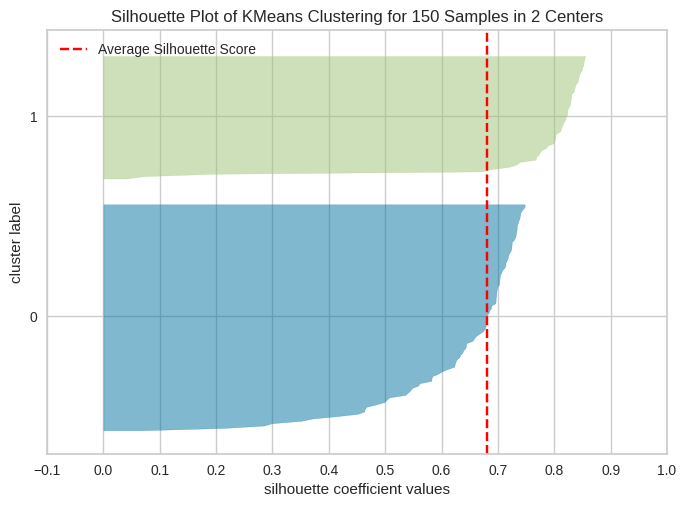

k=3: Inertia (SSE) = 78.85, Silhouette Score = 0.55


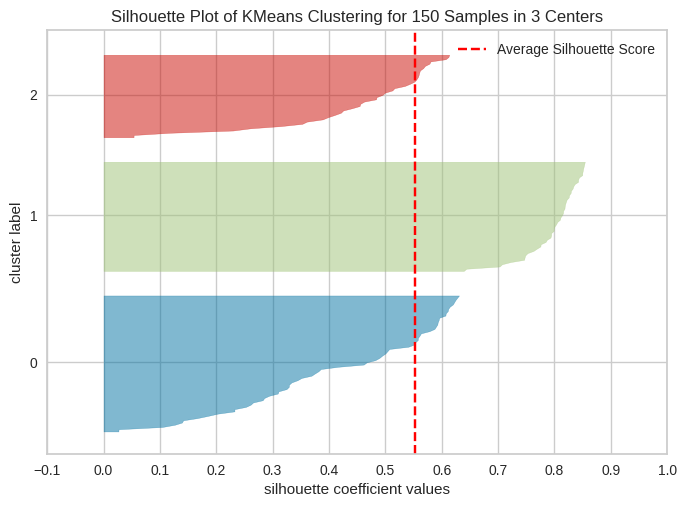

k=4: Inertia (SSE) = 57.23, Silhouette Score = 0.50


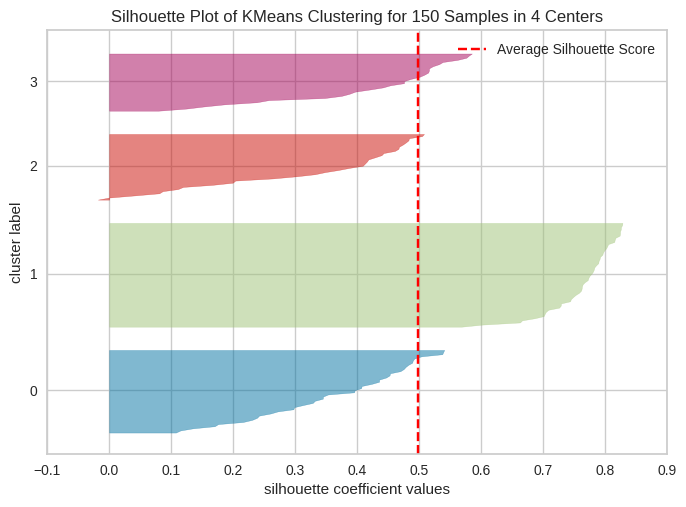

k=5: Inertia (SSE) = 46.45, Silhouette Score = 0.49


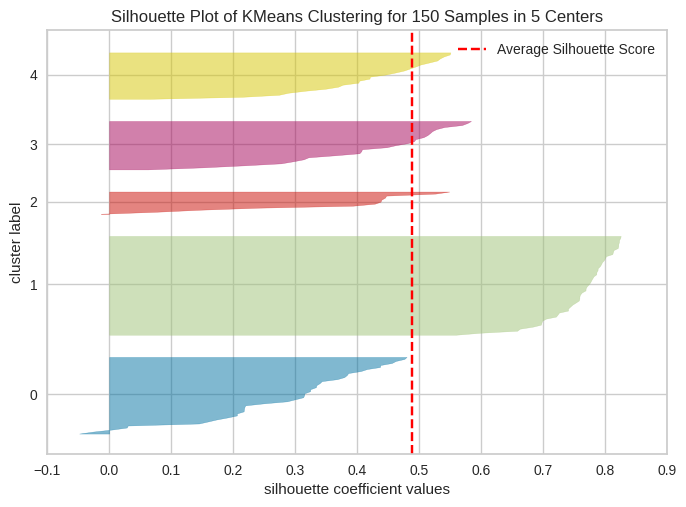

k=6: Inertia (SSE) = 39.04, Silhouette Score = 0.36


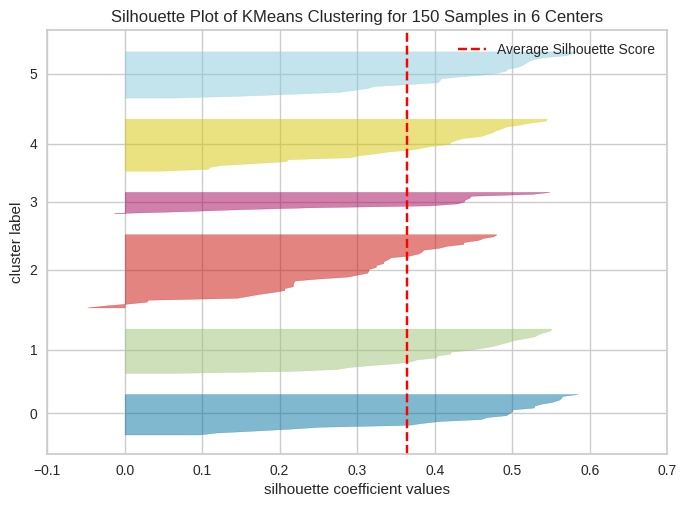

In [24]:
# Iris Clustering with K-means and silhouette graphs
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2, 7):
    # Create a KMeans instance with k clusters
    kmeans = KMeans(n_clusters=k, n_init=10)
    # Create a SilhouetteVisualizer with the KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(X)
    # Compute inertia and silhouette score
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print(f"k={k}: Inertia (SSE) = {inertia:.2f}, Silhouette Score = {silhouette_avg:.2f}")
    # Show the plot
    visualizer.show()

Discuss your results and justify which clustering is best based on the silhouette graphs

Looking at the graphs, there are two main factors that contribute to the silohuette score for each graph and representation: the actual silohuette score and also how well each of the bars falls in line with the score. They all fall within .55 and about .3 and so I think that I would choose either 3 centers (first choice) and 6 centers as a second choice. The 3 centers graph does well because they all fall above the score line but each does have a somewhat gradual drop off making the score go down. 6 also does well but it is more fragmented leading to a lower score. 3 makes sense as the best to me.

## 3 (20%) Iris Clustering with HAC

- Use the same dataset as above and learn with HAC clustering
- Create one table with silhouette scores for k=2-6 for each of the linkage options single, average, complete, and ward

In [27]:
# Define the range of k and linkage options
k_values = range(2, 7)
linkage_options = ['single', 'average', 'complete', 'ward']
#DataFrame to store the silhouette scores
df = pd.DataFrame(index=k_values, columns=linkage_options)

# Perform HAC for each combination of k and linkage
for linkage in linkage_options:
    for k in k_values:
        hac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        hac.fit(X)
        score = silhouette_score(X, hac.labels_)
        df.at[k, linkage] = score

# Display the DataFrame
print("Silhouette Scores:")
df

Silhouette Scores:


,single,average,complete,ward
2,0.686735,0.686735,0.515983,0.686735
3,0.512111,0.554161,0.513595,0.554324
4,0.281939,0.471994,0.499813,0.488967
5,0.283812,0.43067,0.346174,0.484383
6,0.221443,0.34199,0.338203,0.359238


*Discussion and linkage comparison*

- Single Link: Shortest distance between two clusters with two points one from each cluster.
- Average Link: Distance between two clusters using the average dist of all points in each cluster
- Complete Link: Opposite of single; it is the farthest points in each respective cluster.
- Ward's Link: From what I understand, it goes thru and it minimizes cluster variance in each cluster.

There doesn't seem to be a one best in the table in terms of which link approach is taken but I would choose the single linke with two clusters in this case because it does very well in its score. There is little context for that choice but if it is base on the SS, that is the one to choose.

## 4 (20%) Run both algorithms on a real world data
- Choose any real world data set which you have not used previously
- Use parameters of your choosing
- Try each algorithm a few times with different parameters and output one typical example of labels and silhouette scores for each algorithm
- Show the silhouette graph for at least one reasonable *k* value for K-means

In [54]:
penguins_df = pd.read_csv('penguins.csv')

# Replace 'NaN' and '.' in 'sex' column with 'Unknown'
penguins_df['sex'].replace({np.nan: 'Unknown', '.': 'Unknown'}, inplace=True)

# Impute missing values in numerical columns with the median
from sklearn.impute import SimpleImputer
num_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
imputer = SimpleImputer(strategy='median')
penguins_df[num_cols] = imputer.fit_transform(penguins_df[num_cols])

# Perform the mapping on the 'sex' column
sex_mapping = {'MALE': 0, 'FEMALE': 1, 'Unknown': 2}
penguins_df['sex'] = penguins_df['sex'].map(sex_mapping)

K-means Silhouette Score (k=4): 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


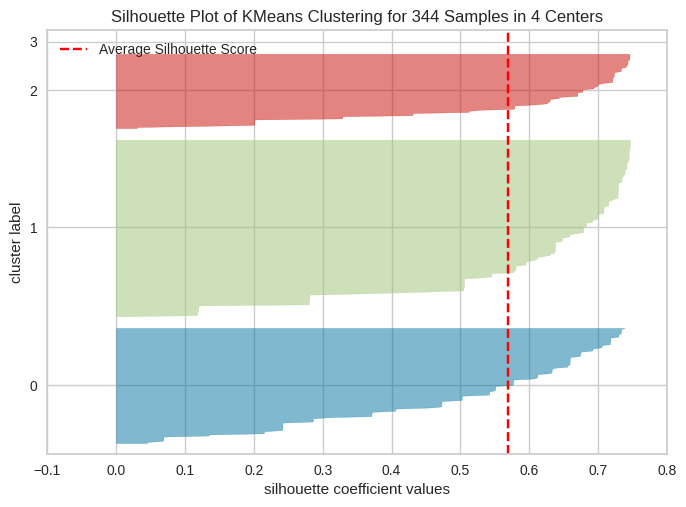

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 344 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [55]:
# Run both algoriths on a data set of your choice
# K-means clustering
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(penguins_df)
kmeans_labels = kmeans.labels_

# Silhouette score for K-means
silhouette_avg_kmeans = silhouette_score(penguins_df, kmeans_labels)
print(f"K-means Silhouette Score (k=4): {silhouette_avg_kmeans:.2f}")

# Silhouette graph for K-means
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(penguins_df)
visualizer.show()

In [60]:
# Define the range of k and linkage options
k_values = range(2, 7)
linkage_options = ['single', 'average', 'complete', 'ward']

# Create a DataFrame to store the silhouette scores
silhouette_scores_df = pd.DataFrame(index=k_values, columns=linkage_options)
# Perform HAC for each combination of k and linkage
for linkage in linkage_options:
    for k in k_values:
        hac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        hac.fit(penguins_df)
        score = silhouette_score(penguins_df, hac.labels_)
        silhouette_scores_df.at[k, linkage] = score

# Display the DataFrame with silhouette scores
print("Silhouette Scores:")
silhouette_scores_df

Silhouette Scores:


,single,average,complete,ward
2,0.811022,0.811022,0.811022,0.613157
3,-0.12786,0.619861,0.605093,0.534613
4,-0.170662,0.585608,0.575443,0.52033
5,-0.2941,0.54924,0.494993,0.506045
6,-0.283641,0.517799,0.492759,0.51179


I decided to do the init feature to have the Kmeans to run the model several times and not have to create my own loop. This ouptut a sil score of .57 and it was able to split the dataset well with 3 clusters. The HAC algorithm performed best with 2 clusters and all of the traditional linkage methods (non ward) were able to do really well. The silohuette score is .81 so for this datasest, the HAC is the best.

## 5. Extra Credit for Coding Your Own Clustering Algorithms
### 5.1 (Optional 10% extra credit) Code up the K-means clustering algorithm
Below is a scaffold you could use if you want. As above, you only need to support numeric inputs, but think about how you would support nominal inputs and unknown values. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to choose *k* and specify the *k* initial centroids.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

### 5.2 (Optional 10% extra credit) Code up the HAC clustering algorithm

- Your model should support the methods shown in the example scaffold below.
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from *n* to 2.  You just need to output results for the curent chosen *k*.
- Run and show the cluster label for each point with both the Iris data set and the data set of your choice above.

Given the fact that HAC is recursive and not as simple, I chose to only code up the KMEANS but it was really simple. The data was able to get the labels pretty simply and it is successful like the actual sklearn implementation of the data. I ran it on the penguin and the iris dataset. THe penguin dataset is a little larger and more complex but it did well.

In [70]:
from sklearn.base import BaseEstimator, ClassifierMixin, ClusterMixin

class KMEANSClustering(BaseEstimator,ClusterMixin):

    def __init__(self, k=3, debug=False, max_iter=100, tol=1e-4): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.labels = None

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        if self.debug:
            # Use the first k instances as initial centroids
            self.centroids = X[:self.k]
        else:
            # Initialize centroids randomly
            random_idx = np.random.permutation(X.shape[0])[:self.k]
            self.centroids = X[random_idx]

        for i in range(self.max_iter):
            # Assign clusters
            distances = np.sqrt(((X - self.centroids[:, np.newaxis])**2).sum(axis=2))
            self.labels = np.argmin(distances, axis=0)

            # Update centroids
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break

            self.centroids = new_centroids

        return self


    def print_labels(self): # Print the cluster label for each data point
        # pass
        if self.labels is not None:
              print("Labels:",self.labels)
        else:
            print("Model has not been fitted yet.")

In [71]:
# Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# Create and fit the model
kmeans = KMEANSClustering(k=3, debug=True)
kmeans.fit(X)

# Print labels
kmeans.print_labels()

#Penguins
kmeans_penguins = KMEANSClustering(k=3, debug=True)
kmeans_penguins.fit(penguins_df.values) # Ensure to convert the DataFrame to numpy array

# Print labels for the penguins dataset
kmeans_penguins.print_labels()

Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
Labels: [2 2 2 0 2 2 2 0 2 0 2 2 2 2 0 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 0 2 0 2 0 0
 2 2 0 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 2 2 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 2 0 2 0 2
 0 2 0 0 0 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2
 2 2 2 0 2 0 2 2 2 0 2 2 0 2 2 2 2 0 2 0 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2
 0 2 0 2 0 2 0 0 2 2 2 2 0 2 0 2 2 2 0 2 0 2 2 2 0 2 2 0 2 2 0 2 2 0 2 0 1
 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0
 1 

In [ ]:
class HACClustering(BaseEstimator,ClusterMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k

    def fit(self, X, y=None):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        return self

    def print_labels(self): # Print the cluster label for each data point
        pass